In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [2]:
sns.set()

#### Leitura dos Dados:

In [3]:
dados = pd.read_excel('C:/Users/Pedro/Documents/Ufrj/Exploração Mineral/PMAsBi/Para de Minas2.xls')

In [4]:
dados_as = dados['As (PPM)']
dados_bi = dados['Bi (PPM)']

dados['As (PPM) loge'] = np.log10(dados_as)
dados['Bi (PPM) loge'] = np.log10(dados_bi)

log_as = dados['As (PPM) loge']
log_bi = dados['Bi (PPM) loge']

In [5]:
type(dados_as.loc[1])

numpy.float64

In [6]:
def vis_dist(dist1, dist2):
    ax, fig = plt.subplots(figsize=(20,10))
    
    plt.subplot(221)
    sns.distplot(dist1)
    plt.axvline(x=np.median(dist1), linestyle='--', label='Mediana', color='orange')
    plt.legend()
    plt.title('Distribuição de '+ dist1.name)
    plt.xlim(np.min(dist1)-0.5, np.max(dist1)+0.5)
    
    plt.subplot(222)
    plt.axvline(x=np.median(dist2), linestyle='--', label='Mediana', color='blue')
    sns.distplot(dist2, color='orange')
    plt.xlim(np.min(dist2)-1, np.max(dist2)+1)
    plt.legend()
    plt.title('Distribuição '+ dist2.name)
    
    plt.subplot(223)
    sns.boxplot(dist1)
    plt.xlim(np.min(dist1)-0.5, np.max(dist1)+0.5)
    
    plt.subplot(224)
    sns.boxplot(dist2, color='orange')
    plt.xlim(np.min(dist2)-1, np.max(dist2)+1)
    
    return ax, fig

C:\Users\Pedro\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


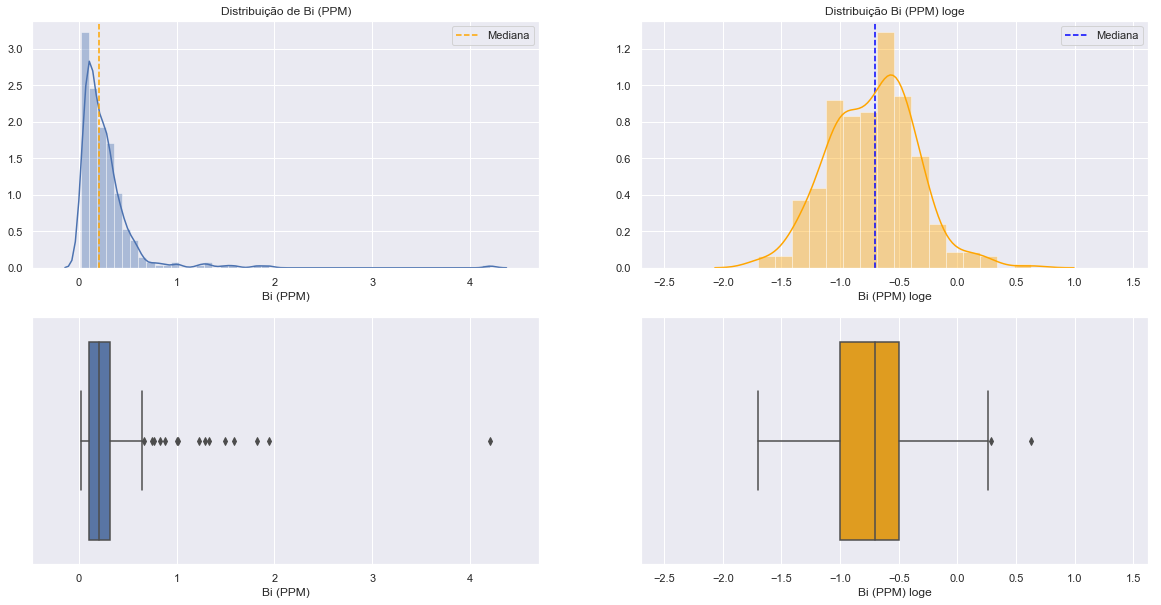

In [7]:
ax, fig = vis_dist(dados_bi, log_bi)

In [8]:
ax.savefig('Distribuições em escala aritmética e Log Bi2.png', bbox_inches='tight')

#### Definição do número de intervalo de classes pela fórmula de Sturges:



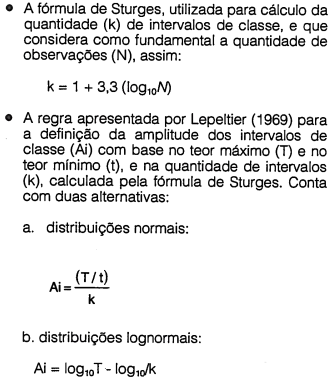

In [9]:
def determinar_param(dados):
    n = dados.count()
    k = 1 + 3.3*(np.log10(n))
    T = np.max(dados)
    t = np.min(dados)
    Ai = (T-t)/k
    std = np.std(dados)
    print(dados.describe())
    return T, t, k, Ai, std

In [10]:
maximo, minimo, k, Ai, std = determinar_param(log_bi)

count    315.000000
mean      -0.725478
std        0.366652
min       -1.698970
25%       -1.000000
50%       -0.698970
75%       -0.494850
max        0.624282
Name: Bi (PPM) loge, dtype: float64


In [11]:
classe1 = []
classe2 = []
classe3 = []
classe4 = []
classe5 = []
classe6 = []
classe7 = []
classe8 = []
classe9 = []
contagem = []

def classes_frequencias(dados):
    for i in dados:    
        if i >= minimo and i < Ai:
            classe1.append(i)
        
        if i >= Ai and i < 2*Ai:
            classe2.append(i)
    
        if i >= 2*Ai and i < 3*Ai:
            classe3.append(i)
    
        if i >= 3*Ai and i < 4*Ai:
            classe4.append(i)
    
        if i >= 4*Ai and i < 5*Ai:
            classe5.append(i)
    
        if i >= 5*Ai and i < 6*Ai:
            classe6.append(i)
    
        if i >= 6*Ai and i < 7*Ai:
            classe7.append(i)
    
        if i >= 7*Ai and i < 8*Ai:
            classe8.append(i)
    
        if i >= 8*Ai:
            classe9.append(i)
    
    
    contagem.append(float(len(classe1))); contagem.append(float(len(classe2))); contagem.append(float(len(classe3)));
    contagem.append(float(len(classe4))); contagem.append(float(len(classe5))); contagem.append(float(len(classe6)));
    contagem.append(float(len(classe7))); contagem.append(float(len(classe8))); contagem.append(float(len(classe9)))

    freq_relativa = []

    for i in contagem:
        freq = (i/315)*100
        freq_relativa.append(freq)
    
    intervalos_min = []
    intervalos_max = []
    
    for i in range(0,9):
        intervalos_min.append(minimo +i*Ai)
        
    for i in range(1,9):
        intervalos_max.append(i*Ai)
    intervalos_max.append(maximo)

    return contagem, freq_relativa, intervalos_min, intervalos_max

In [12]:
contagem, freq_relativa, intervalos_min, intervalos_max = classes_frequencias(log_bi)

### Criação da Tabela de Frequências:

In [13]:
freq = pd.DataFrame()

contagem = np.asarray(contagem)
freq_relativa = np.asarray(freq_relativa)
freq_acumulada = contagem.cumsum()
freq_acum_dir = []
for i in freq_acumulada:
    freq_acum_dir.append(i/315)
freq_acum_dir = np.asarray(freq_acum_dir)
intervalos_min = np.asarray(intervalos_min)
intervalos_max = np.asarray(intervalos_max)

freq.insert(loc=0, column='Mínimo', value=intervalos_min)
freq.insert(loc=1, column='Máximo', value=intervalos_max)
freq.insert(loc=2, column='Mínimo (log)', value=np.log(intervalos_min))
freq.insert(loc=3, column='Frequência Absoluta', value=contagem)
freq.insert(loc=4, column='Frequência Relativa (%)', value=freq_relativa)
freq.insert(loc=5, column='Frequência Acumulada', value=freq_acumulada)
freq.insert(loc=6, column='Frequência Acumulada Direta (%)', value=freq_acum_dir)
freq.insert(loc=7, column='Frequência Acumulada Invertida (%)', value=freq_acum_dir[::-1])

C:\Users\Pedro\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [14]:
freq

,Mínimo,Máximo,Mínimo (log),Frequência Absoluta,Frequência Relativa (%),Frequência Acumulada,Frequência Acumulada Direta (%),Frequência Acumulada Invertida (%)
0,-1.698970,0.251314,NaN,312.0,99.047619,312.0,0.990476,1.000000
1,-1.447656,0.502628,NaN,2.0,0.634921,314.0,0.996825,1.000000
2,-1.196342,0.753942,NaN,1.0,0.317460,315.0,1.000000,1.000000
3,-0.945028,1.005255,NaN,0.0,0.000000,315.0,1.000000,1.000000
4,-0.693715,1.256569,NaN,0.0,0.000000,315.0,1.000000,1.000000
5,-0.442401,1.507883,NaN,0.0,0.000000,315.0,1.000000,1.000000
6,-0.191087,1.759197,NaN,0.0,0.000000,315.0,1.000000,1.000000
7,0.060227,2.010511,-2.809634,0.0,0.000000,315.0,1.000000,0.996825
8,0.311541,0.624282,-1.166225,0.0,0.000000,315.0,1.000000,0.990476


###### Salvando em excel:

In [15]:
freq.to_excel('Tabela de Frequências Bi.xls')

# Tabela Log x Probabilidade: 

In [16]:
def vis_logprob(dados):
    x = np.sort(dados)
    y = np.arange(1, len(x)+1)/len(x)
    
    fig = plt.figure(figsize=(9,5))
    
    plt.grid(True, which="both")
    
    plt.axhline(np.median(dados), linestyle='--', label='Mediana', color='green', linewidth=0.5)
    plt.axhline(np.mean(dados), linestyle='--', label='Média', color='red', linewidth=0.5)
    plt.semilogy(y[::-1], x, 'o', markersize=1.5)
    plt.axvline(0.047, linestyle='--', color='orange', label='Limiar de Anomalia', linewidth=0.5)
    #plt.plot(0.073, 25.19, 'x', color='blue', label='Ponto de Inflexão')
    #plt.plot(0.32, 5.13, 'x', color='blue')
    plt.title(str(dados.name) +' Log x Probabilidade Acumulada')
    plt.xlabel('Probabilidade (%)')
    plt.ylabel(str(dados.name))
    plt.legend()
    
    plt.show()
    
    return fig


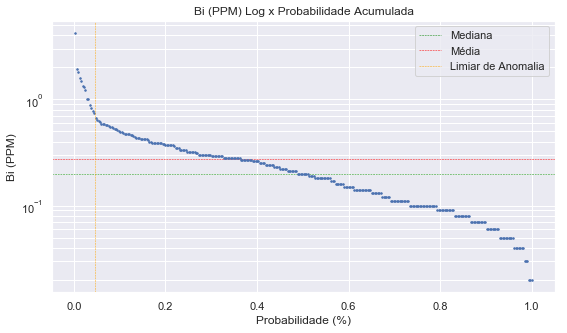

In [17]:
fig = vis_logprob(dados_bi)
# fig.savefig('Log x Prob (Bi).png')

In [18]:
limiar_as = 25.19
limiar_bi = 0.61

# Classificando em Anomalo x Background

In [19]:
def classificar(x, limiar):
    if x >= limiar:
        x = 'Anomalo'
    else:
        x = 'Background'
    return x

def tabela_classificada(df_dados, elemento, limiar):
    elemento = elemento.name
    df_dados['Anomalia '+str(elemento)] = df_dados[elemento].apply(lambda row: classificar(row, limiar))
    
    return df_dados


In [20]:
tabela = tabela_classificada(dados, dados_as, limiar_as)
tabela_final = tabela_classificada(tabela, dados_bi, limiar_bi)

In [21]:
tabela_final.columns

Index(['Estação', 'N. Lab.', 'Long (X)', 'Lat (Y)', 'Laboratorio',
       'Cod análise', 'Tipo de amostra', 'As (PPM)', 'Bi (PPM)',
       'As (PPM) loge', 'Bi (PPM) loge', 'Anomalia As (PPM)',
       'Anomalia Bi (PPM)'],
      dtype='object')

In [22]:
# tabela_final.to_excel('Tabela Final.xls')

# Processando Shapefiles:

In [23]:
import geopandas as gpd
import pyproj
from shapely import geometry

In [24]:
tabela_final['Geometria'] = [geometry.Point(x, y) for x, y in zip(tabela_final['Long (X)'], tabela_final['Lat (Y)'])]


In [25]:
tabela = gpd.GeoDataFrame(tabela_final, geometry='Geometria')

todospontos = geometry.MultiPoint(tabela['Geometria'])
limites = todospontos.envelope

In [26]:
litologias = gpd.read_file('C:/Users/Pedro/Documents/Ufrj/Exploração Mineral/PMAsBi/Litologia/pminas_lito.shp')
hidrog = gpd.read_file('C:/Users/Pedro/Documents/Ufrj/Exploração Mineral/PMAsBi/Hidrografia/pminas_unifilar.shp')

In [27]:
hidrog.loc[3]

Nome                                           Córr. Chacuinha
Tipo                                                Rio Perene
Ordem                                                     None
Bacia                               Bacia do Rio São Francisco
rio_e_rib                                                 None
Nome1                                                     None
geometry     LINESTRING (-44.59024024196631 -19.50581850811...
Name: 3, dtype: object

In [28]:
litos = litologias.loc[:, ['LITOTIPO1', 'LITOTIPO2', 'geometry']]

TypeError: Empty 'DataFrame': no numeric data to plot

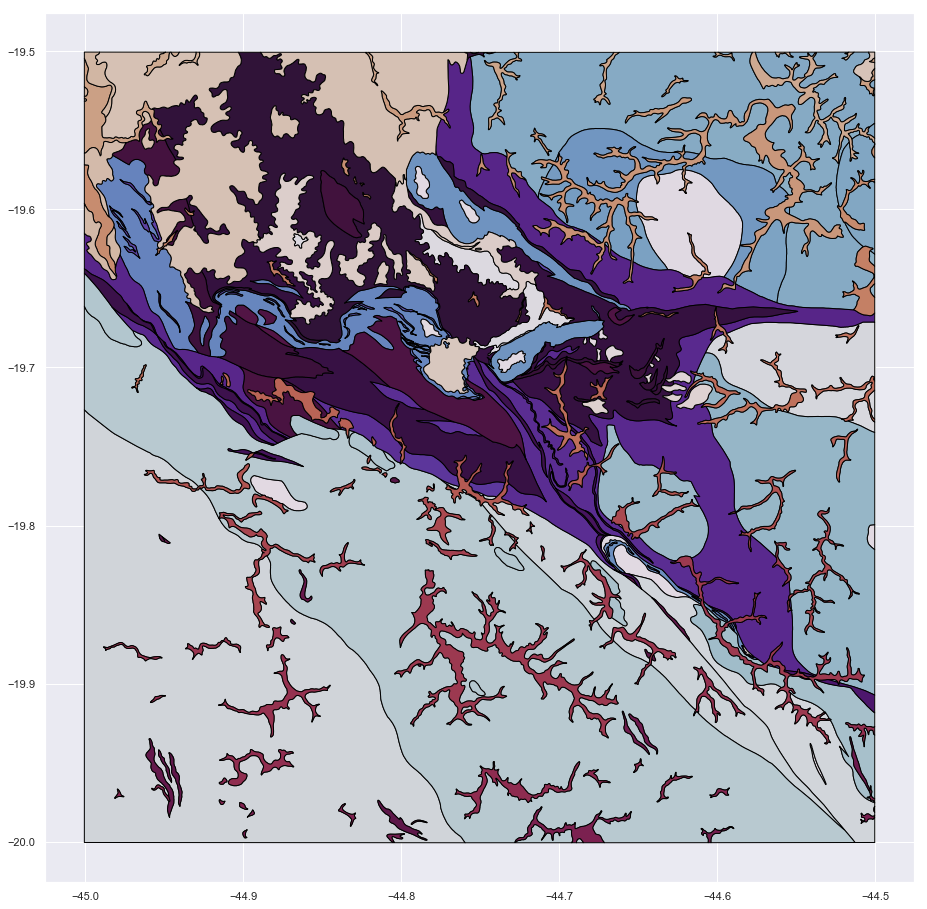

In [35]:


fig, ax = plt.subplots(figsize = (20,16)) 
litos.plot(facecolor='w', edgecolor='black', ax=ax, cmap='twilight', label=litos.LITOTIPO1)
tabela_final.Geometria.plot()
hidrog.plot(ax=ax)


In [30]:
litologias.LITOTIPO1.unique()

array(['Granito', None, 'Diamictito', 'Arcóseo', 'Varvito', 'Gnaisse',
       'Granodiorito, Granito, Tonalito',
       'Granito, Granito gnaisse, Granodiorito', 'Metaconglomerado',
       'Depósitos de cascalho, Depósitos de argila, Depósitos de areia',
       'Arenito, Siltito', 'Rocha pelítica, Marga', 'Rocha metapelítica'],
      dtype=object)

In [31]:
tabela_final.columns

Index(['Estação', 'N. Lab.', 'Long (X)', 'Lat (Y)', 'Laboratorio',
       'Cod análise', 'Tipo de amostra', 'As (PPM)', 'Bi (PPM)',
       'As (PPM) loge', 'Bi (PPM) loge', 'Anomalia As (PPM)',
       'Anomalia Bi (PPM)', 'Geometria'],
      dtype='object')

In [39]:
#p1 = pyproj.Proj('+proj=longlat +datum=WGS84 +no_defs')
#p2 = pyproj.Proj("+proj=utm +zone=23 +south +datum=WGS84 +units=m +no_defs")#


p1 = pyproj.Proj(proj='latlong', datum='WGS84')
p2 = pyproj.Proj(proj='utm', zone=23, datum='WGS84')

#tabela_final['Long (X)'], tabela_final['Lat (Y)'] = pyproj.transform(p1, p2, 

#                                                            mag_data.longitude.values, 

#                                                            mag_data.latitude.values)

tabela_final['Long (X)2'], tabela_final['Lat (Y)2'] = pyproj.transform(p1, p2,
                                                        tabela_final['Long (X)'].values,
                                                        tabela_final['Lat (Y)'].values)

SyntaxError: invalid syntax (<ipython-input-39-03e9f461f4da>, line 6)

In [36]:
tabela_final['Geometria2'] = [geometry.Point(x, y) for x, y in zip(tabela_final['Long (X)2'], tabela_final['Lat (Y)2'])]

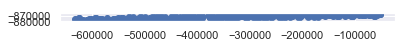

In [38]:
tabela = gpd.GeoDataFrame(tabela_final, geometry='Geometria2')
tabela.Geometria2.plot()